# Introduction

I got the idea for this project from Aman Kharwal's blog post in the thecleverprogrammer.com website. He wrote a walkthrough on a Whatsapp sentiment analysis using python. So after having stumbled on the post, I decided to do something similar as  a practice beginner project. Here, I will be using the whatsapp messages data from a friend's hostel room groupchat. This information doubles as an indicator the nature of messages we'll be working with here.Plus most of the language will be in pidgin English with a sprinkling of indigenous vernacular. Should be fun.

### Import Libraries

I'll be importing the usual python libraries. I'll import regex because we'll need to do some text formatting on the raw messsage data. For obvious reasons we will also be importing the emoji function. And to do some fancy visualization of our analysis, we'll import a word cloud generator

In [1]:
#pip install emoji

In [2]:
#pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import regex
import emoji
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Import the Data

In [4]:
wd = "WhatsApp Chat with Live and let's resume.txt"

f=open(wd, encoding='utf-8')
data=[]
for line in f.readlines():
    #nl = line.split('-')
    data.append(line)

In [5]:
data[:15]

['14/08/2022, 23:39 - You created group "Live and let\'s live"\n',
 '22/10/2022, 19:29 - Muhammadinho 69: <Media omitted>\n',
 '22/10/2022, 19:31 - Sir Daniel Roomie: <Media omitted>\n',
 '22/10/2022, 19:32 - Muhammadinho 69: Na so we see wetin asuu cos like this\n',
 '22/10/2022, 19:36 - Sir Daniel Roomie: 🤣🤣\n',
 '22/10/2022, 19:36 - Sir Daniel Roomie: Omo\n',
 '22/10/2022, 20:27 - MacSauce Zen: I need hypo to wash my eyes\n',
 '22/10/2022, 21:41 - Sir Daniel Roomie: 🤣🤣🤣\n',
 '22/10/2022, 21:54 - Uthman Mr. Money: REST GUY\n',
 '22/10/2022, 21:54 - Uthman Mr. Money: 😂😂\n',
 '22/10/2022, 23:06 - MacSauce Zen: D assignment na 2a right?\n',
 '\n',
 '@2348148837221 @2348161275772\n',
 '22/10/2022, 23:08 - Muhammadinho 69: Abeg Do my own guy\n',
 '23/10/2022, 07:12 - MacSauce Zen: 2k\n']

### Cleaning and Appending the Data to a Dataframe

In [6]:
def date_time(x):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+) -'
    if regex.match(pattern,x):
        result = regex.search(pattern,x).group()
        
        dateTime = result.split(',')
        date = dateTime[0].strip()
        time = dateTime[1][:-2].strip()
        return date,time
    else:
        date = ''
        time = ''
        return date, time

def message_author(x):
    msgAuth = x.split(' - ')
    if len(msgAuth)>=2:
        msgA = ''.join(msgAuth[1:])
        spl = msgA.split(':')
        if len(spl)>=2:
            Auth = spl[0].strip()
            msg=''.join(spl[1:])
            message =msg.strip()
    
            return message, Auth 
        elif len(spl)<2:
            Auth = 'none'
            message = ''.join(msgA).strip()
        
            return message, Auth
    else:
        Auth = 'none'
        message = ''.join(msgAuth).strip()
            
        return message, Auth
    



In [7]:
date_list =[]
time_list =[]
msg_list = []
Auth_list=[]
for line in data:
    date, time = date_time(line)
    msg, Auth = message_author(line)
    date_list.append(date)
    time_list.append(time)
    msg_list.append(msg)
    Auth_list.append(Auth)
    

In [8]:
print(len(date_list))
print(len(time_list))
print(len(msg_list))
print(len(Auth_list))

2657
2657
2657
2657


In [9]:
date_series = pd.Series(date_list)
time_series = pd.Series(time_list)
msg_series = pd.Series(msg_list)
Auth_series = pd.Series(Auth_list)

In [10]:
messages_df = pd.concat([date_series, time_series, msg_series, Auth_series], axis=1)

In [11]:
messages_df.columns = ['Date', 'Time', 'Message', 'Author']

### The Dataframe

In [12]:
messages_df

,Date,Time,Message,Author
0,14/08/2022,23:39,"You created group ""Live and let's live""",none
1,22/10/2022,19:29,<Media omitted>,Muhammadinho 69
2,22/10/2022,19:31,<Media omitted>,Sir Daniel Roomie
3,22/10/2022,19:32,Na so we see wetin asuu cos like this,Muhammadinho 69
4,22/10/2022,19:36,🤣🤣,Sir Daniel Roomie
...,...,...,...,...
2652,05/01/2023,12:41,<Media omitted>,Uthman Mr. Money
2653,05/01/2023,12:44,<Media omitted>,MacSauce Zen
2654,05/01/2023,12:44,Fake phone,Sir Daniel Roomie
2655,05/01/2023,12:51,<Media omitted>,Uthman Mr. Money


In [13]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2657 non-null   object
 1   Time     2657 non-null   object
 2   Message  2657 non-null   object
 3   Author   2657 non-null   object
dtypes: object(4)
memory usage: 83.2+ KB


In [14]:
messages_df.describe()

,Date,Time,Message,Author
count,2657,2657,2657,2657
unique,61,587,1236,12
top,,,Rest rest,none
freq,1160,1160,857,1168


In [15]:
messages_df.isna().sum()

Date       0
Time       0
Message    0
Author     0
dtype: int64

We see that there are no null entries in the dataframe. There are 2657 messages in all with 12 authors,but among this 12 is author 'none'. No one in the group chat has name 'none'. In the text file, multi-line messages only have author names appended on the first line, the other lines had the author name empty. During cleaning and filling, I replaced the empty slots with 'none'. Now, I'll attempt to correct it by replacing 'none' with the author name in the preceeding row.

In [16]:
def fix_nones(author):
    for i in range(len(author)):
        if i == 0:
        #the message at row[0] is automatically generated, so author is none.
            author[i] == 'none'
        if i >= 1:
            if author[i]=='none':
                author[i]=author[i-1]
    return author
            
    

In [17]:
fixed_auth_list = fix_nones(Auth_list)
fixed_auth_series = pd.Series(fixed_auth_list)
messages_df['Author']=fixed_auth_series

In [18]:
messages_df.head(50)

,Date,Time,Message,Author
0,14/08/2022,23:39,"You created group ""Live and let's live""",none
1,22/10/2022,19:29,<Media omitted>,Muhammadinho 69
2,22/10/2022,19:31,<Media omitted>,Sir Daniel Roomie
3,22/10/2022,19:32,Na so we see wetin asuu cos like this,Muhammadinho 69
4,22/10/2022,19:36,🤣🤣,Sir Daniel Roomie
5,22/10/2022,19:36,Omo,Sir Daniel Roomie
6,22/10/2022,20:27,I need hypo to wash my eyes,MacSauce Zen
7,22/10/2022,21:41,🤣🤣🤣,Sir Daniel Roomie
8,22/10/2022,21:54,REST GUY,Uthman Mr. Money
9,22/10/2022,21:54,😂😂,Uthman Mr. Money


In [19]:
messages_df.describe()

,Date,Time,Message,Author
count,2657,2657,2657,2657
unique,61,587,1236,12
top,,,Rest rest,MacSauce Zen
freq,1160,1160,857,1525


There, we fixed the 'none' error. I showed the 50 head rows so we can be sure that the error has indeed been fixed, and in the dataframe description, we see that 'none' is no longer the top Author. 
A bit of cleaning still needed to be done though. While python tells us there are no null values in our dataframe, there are rows with empty messages and timestamps. This is due to paragraph spacing in some of the texts. I'll go ahead and drop these empty rows.

In [20]:
messages_df[messages_df['Message']=='']

,Date,Time,Message,Author
11,,,,MacSauce Zen
43,,,,MacSauce Zen
49,,,,MacSauce Zen
79,,,,Ayomide Roomie
251,,,,Sir Daniel Roomie
...,...,...,...,...
2371,,,,MacSauce Zen
2560,,,,MacSauce Zen
2562,,,,MacSauce Zen
2564,,,,MacSauce Zen


In [21]:
messages_df.drop(messages_df[messages_df['Message']==''].index, axis=0, inplace=True)
messages_df = messages_df.reset_index()

In [22]:
messages_df[messages_df['Message']=='']

,index,Date,Time,Message,Author


In [23]:
messages_df.describe()

,index
count,2587.000000
mean,1322.533823
std,764.442426
min,0.000000
25%,668.500000
50%,1315.000000
75%,1974.500000
max,2656.000000


### Exploring The Data

In [24]:
#To check the total number of messages
messages_df.shape[0]

2587

In [25]:
#We extract the hour from the time column and see what time of the day the group chat gets active the most
messages_df['HourOfDay'] = pd.to_datetime(messages_df['Time']).dt.hour

In [26]:
messages_df.head(10)

,index,Date,Time,Message,Author,HourOfDay
0,0,14/08/2022,23:39,"You created group ""Live and let's live""",none,23.0
1,1,22/10/2022,19:29,<Media omitted>,Muhammadinho 69,19.0
2,2,22/10/2022,19:31,<Media omitted>,Sir Daniel Roomie,19.0
3,3,22/10/2022,19:32,Na so we see wetin asuu cos like this,Muhammadinho 69,19.0
4,4,22/10/2022,19:36,🤣🤣,Sir Daniel Roomie,19.0
5,5,22/10/2022,19:36,Omo,Sir Daniel Roomie,19.0
6,6,22/10/2022,20:27,I need hypo to wash my eyes,MacSauce Zen,20.0
7,7,22/10/2022,21:41,🤣🤣🤣,Sir Daniel Roomie,21.0
8,8,22/10/2022,21:54,REST GUY,Uthman Mr. Money,21.0
9,9,22/10/2022,21:54,😂😂,Uthman Mr. Money,21.0


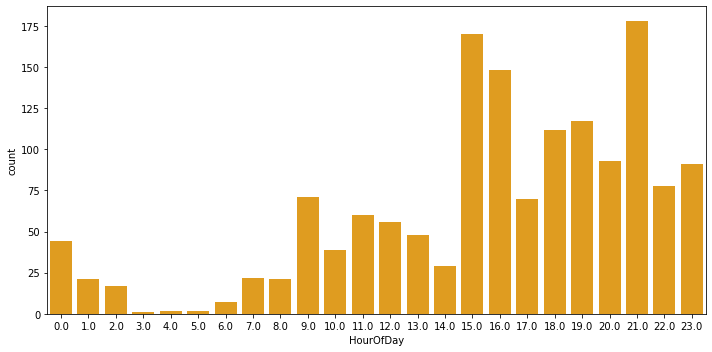

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='HourOfDay', data=messages_df, color='orange')
plt.tight_layout()

In the bar plot above, we see that the group chat gets more active as the day progresses. The amount of messages rise steadily from the waking hours of the morning till afternoon where we see peak activity between 3 and 4pm. Activity slows down till late evening where we see activity peak at 9pm. Activity on the group chat then start to dwindle before finally flatlining between 3 to 5am

C:\Users\User\AppData\Local\Temp\ipykernel_9464\4273429233.py:4: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


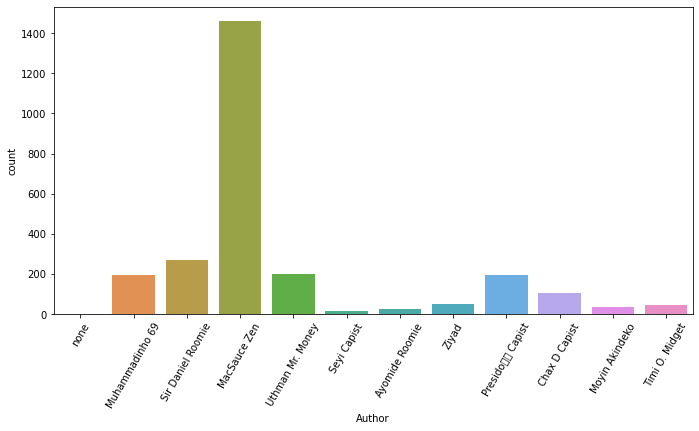

In [28]:
#Now, we try to find out who wins the Most Active Chat Member Award
plt.figure(figsize=(10,5))
sns.countplot(x='Author', data=messages_df)
plt.tight_layout()
plt.tick_params(axis='x', rotation=60)

It's a landslide victory for Mr MacSauce Zen, no-one came close.

In [29]:
#A look at the Emojis
emoji_list = []


for i in range(len(messages_df['Message'])):
    emj = emoji.emoji_list(messages_df['Message'][i])
    
    for match in emj:
        emoji_list.append(match['emoji'])

print(emoji_list)

['🤣', '🤣', '🤣', '🤣', '🤣', '😂', '😂', '😁', '😁', '😁', '😁', '😁', '😁', '🤦\u200d♂️', '🤦\u200d♂️', '😁', '😁', '😁', '😁', '🙌', '🙌', '🙌', '😳', '😂', '🤣', '🤣', '🤣', '😪', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😩', '🤣', '🤣', '🤣', '🌚', '😌', '🤲', '🤣', '🤣', '🤣', '😹', '😹', '😂', '😂', '😐', '🙆\u200d♂️', '🙆\u200d♂️', '🙆\u200d♂️', '🙆\u200d♂️', '🙆\u200d♂️', '🙆\u200d♂️', '🙆\u200d♂️', '🙆\u200d♂️', '🤣', '🤣', '😂', '😂', '😂', '🌝', '🙃', '🙃', '😂', '😂', '🤣', '🤣', '🤣', '😂', '😂', '🙌', '😹', '😹', '😹', '🤣', '🤣', '😏', '😹', '😏', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😂', '😂', '😂', '🤣', '🤣', '😂', '😂', '😂', '🤣', '🤣', '😹', '😹', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😹', '😹', '🤩', '☹️', '\U0001fae0', '💰', '🇩🇿', '🇳🇬', '🇲🇦', '🇪🇬', '🇱🇾', '🇿🇦', '🇰🇪', '🇹🇳', '🇦🇴', '🇺🇬', '🌐', '©️', '👀', '👀', '👀', '😹', '😹', '😹', '😹', '😹', '😹', '😂', '😂', '😂', '😹', '😹', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😹', '😹', '😂', '😂', '😂', '😂', '🤣', '🤣', '🤣', '🤣', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '😂', '🤣', '🤣', '🤣', '🤣', '🤣', '👑', '🙌'

In [30]:
counter = {}

for emoji in emoji_list:
    if emoji not in counter:
        counter[emoji] = 0
    counter[emoji] += 1

In [31]:
top_emojis = sorted(counter.items(), key =  lambda x:x[1], reverse=True)
top_emojis

[('🤣', 191),
 ('😂', 186),
 ('😹', 100),
 ('😁', 19),
 ('🙌', 18),
 ('🙆\u200d♂️', 11),
 ('\U0001fae0', 8),
 ('🥲', 8),
 ('😀', 7),
 ('🤝', 7),
 ('😏', 6),
 ('🤦\u200d♂️', 5),
 ('🌚', 5),
 ('👀', 5),
 ('😕', 4),
 ('😭', 3),
 ('💔', 3),
 ('🔥', 3),
 ('🥶', 3),
 ('😅', 3),
 ('🌝', 2),
 ('🙃', 2),
 ('☹️', 2),
 ('🤔', 2),
 ('🙌🏽', 2),
 ('🤌🏿', 2),
 ('🤌🏾', 2),
 ('😳', 1),
 ('😪', 1),
 ('😩', 1),
 ('😌', 1),
 ('🤲', 1),
 ('😐', 1),
 ('🤩', 1),
 ('💰', 1),
 ('🇩🇿', 1),
 ('🇳🇬', 1),
 ('🇲🇦', 1),
 ('🇪🇬', 1),
 ('🇱🇾', 1),
 ('🇿🇦', 1),
 ('🇰🇪', 1),
 ('🇹🇳', 1),
 ('🇦🇴', 1),
 ('🇺🇬', 1),
 ('🌐', 1),
 ('©️', 1),
 ('👑', 1),
 ('🏃\u200d♀️', 1),
 ('🧎\u200d♂️', 1),
 ('💯', 1),
 ('😎', 1),
 ('😋', 1),
 ('🤲🏽', 1),
 ('👇', 1)]

In [32]:
emoji_df = pd.DataFrame(top_emojis, columns = ['Emoji','Count'])
emoji_df

,Emoji,Count
0,🤣,191
1,😂,186
2,😹,100
3,😁,19
4,🙌,18
5,🙆‍♂️,11
6,🫠,8
7,🥲,8
8,😀,7
9,🤝,7


### Looking through the emoji dataframe, we see that laughing and smiling emojis are the most used in the group chat. This indicates the tone of most conversations on the chat.

## Generating Wordclouds  for the Chat

In [33]:
messages_df.groupby('Author').describe()

index                                                    \
                    count         mean         std     min      25%     50%   
Author                                                                        
Ayomide Roomie       24.0    87.916667   27.013550    39.0    74.75    81.5   
Chax D Capist       104.0  1445.769231  825.158487   180.0   335.50  1718.0   
MacSauce Zen       1460.0  1244.291096  649.688905     6.0   758.75  1147.5   
Moyin Akindeko       35.0  2017.885714  469.979334  1499.0  1562.50  1801.0   
Muhammadinho 69     197.0  1341.624365  886.218440     1.0   379.00  1524.0   
Presido🤩🤩 Capist    194.0  1750.505155  739.398343    89.0  1674.75  1791.0   
Seyi Capist          14.0  1235.857143  934.002459    33.0   144.50  1458.0   
Sir Daniel Roomie   267.0  1323.524345  912.667578     2.0   264.50  1575.0   
Timi O. Midget       44.0  2066.750000  361.207415  1627.0  1710.25  2155.5   
Uthman Mr. Money    198.0  1153.974747  877.037616     8.0   452.50   709.0   
Ziyad                49.0  1788.346939  737.121189    73.0  1656.00  1911.0   
none                  1.0     0.000000         NaN     0.0     0.00     0.0   

                                   HourOfDay                             \
                       75%     max     count       mean       std   min   
Author                                                                    
Ayomide Roomie      108.00   135.0      17.0  14.470588  1.699913  12.0   
Chax D Capist      2161.75  2549.0     104.0  15.682692  4.190290   2.0   
MacSauce Zen       1714.50  2653.0     391.0  14.565217  6.694063   0.0   
Moyin Akindeko     2510.00  2613.0      35.0  14.200000  7.128237   0.0   
Muhammadinho 69    2229.00  2618.0     197.0  15.989848  5.510648   0.0   
Presido🤩🤩 Capist   2247.75  2656.0     194.0  16.154639  4.541895   0.0   
Seyi Capist        2086.75  2474.0      14.0  16.714286  4.232267  11.0   
Sir Daniel Roomie  2219.00  2654.0     265.0  15.743396  4.972862   0.0   
Timi O. Midget     2400.25  2546.0      36.0  18.250000  4.265309   0.0   
Uthman Mr. Money   1856.25  2655.0     197.0  17.487310  4.820883   1.0   
Ziyad              2308.00  2469.0      46.0  15.239130  6.637218   0.0   
none                  0.00     0.0       1.0  23.000000       NaN  23.0   

                                             
                     25%   50%    75%   max  
Author                                       
Ayomide Roomie     12.00  15.0  16.00  16.0  
Chax D Capist      15.00  16.0  19.00  23.0  
MacSauce Zen       11.00  16.0  20.00  23.0  
Moyin Akindeko      9.50  15.0  19.50  23.0  
Muhammadinho 69    13.00  16.0  21.00  23.0  
Presido🤩🤩 Capist   15.00  17.0  19.00  23.0  
Seyi Capist        12.25  17.0  19.75  22.0  
Sir Daniel Roomie  12.00  16.0  20.00  23.0  
Timi O. Midget     16.00  19.0  22.00  23.0  
Uthman Mr. Money   15.00  20.0  21.00  23.0  
Ziyad              15.00  16.0  20.00  23.0  
none               23.00  23.0  23.00  23.0

In [34]:
len(messages_df.Message)

2587

In [35]:
#We need to remove the "Media Omitted" tags from our messages so they don't affect the resulting wordcloud.
nomedia_messages = messages_df[messages_df['Message']!= '<Media omitted>']

In [36]:
chatter = ' '.join(words for words in nomedia_messages.Message)
#chatter

In [37]:
stopwords = set(STOPWORDS)

(-0.5, 399.5, 199.5, -0.5)

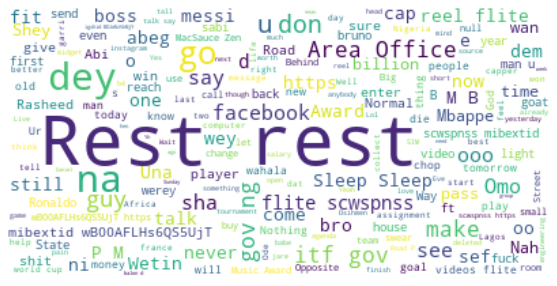

In [38]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(chatter)
wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [39]:
#Let's check Mr MacSauce's Wordcloud too
ms_messages = messages_df[messages_df['Author']=='MacSauce Zen']
ms_messages = ms_messages[ms_messages['Message']!= '<Media omitted>']
ms_messages.head()

,index,Date,Time,Message,Author,HourOfDay
6,6,22/10/2022,20:27,I need hypo to wash my eyes,MacSauce Zen,20.0
10,10,22/10/2022,23:06,D assignment na 2a right?,MacSauce Zen,23.0
11,12,,,@2348148837221 @2348161275772,MacSauce Zen,NaN
13,14,23/10/2022,07:12,2k,MacSauce Zen,7.0
14,15,23/10/2022,07:12,?,MacSauce Zen,7.0


In [40]:
ms_chatter = ' '.join(words for words in ms_messages.Message)
#ms_chatter

(-0.5, 399.5, 199.5, -0.5)

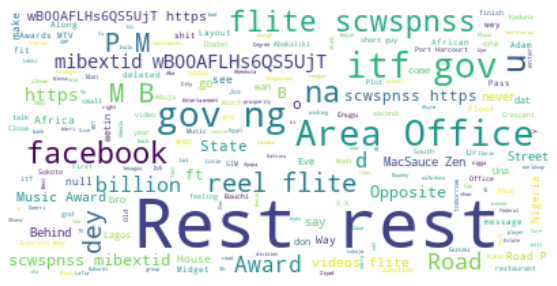

In [41]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(ms_chatter)
wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

If Mr MacSauce's wordcloud seems weird to yoy, don't worry you are not the only one, he happens to be a very weird guy. 

### That would be all guys, Ciao.